# diffusers is a hugging face page for using diffusion models from huggingface hub

In [16]:
!pip install diffusers transformers accelerate

In [24]:
!pip show torch

Name: torch
Version: 2.5.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision


In [19]:
#diffusers is a hugging face page for using diffusion models from huggingface hub
!pip install diffusers transformers accelerate

# Import necessary libraries
from diffusers import StableDiffusionPipeline
import torch

model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

# Now StableDiffusionPipeline is defined and accessible
pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [20]:
prompt = """stars hitting moon with a great force"""



In [23]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

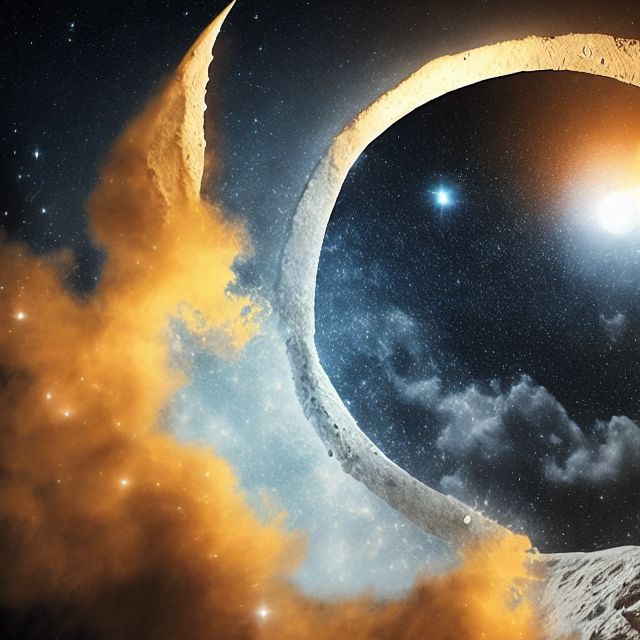

In [22]:
image

In [25]:
!pip install matplotlib

In [26]:
import matplotlib.pyplot as plt

[PROMPT]:  stars hitting moon with a great force


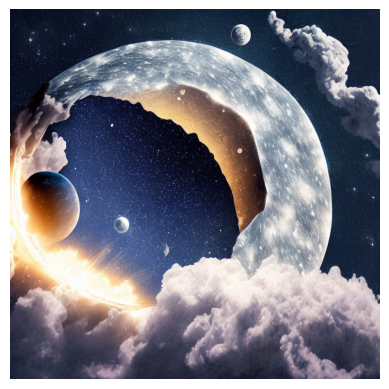

In [27]:
print("[PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off');

In [28]:
prompt2 = """A girl is sittig on a chair & She is accompanied by her tiger. Make sure to keep it cinematic and color to be golden iris
"""

image = pipe(prompt2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

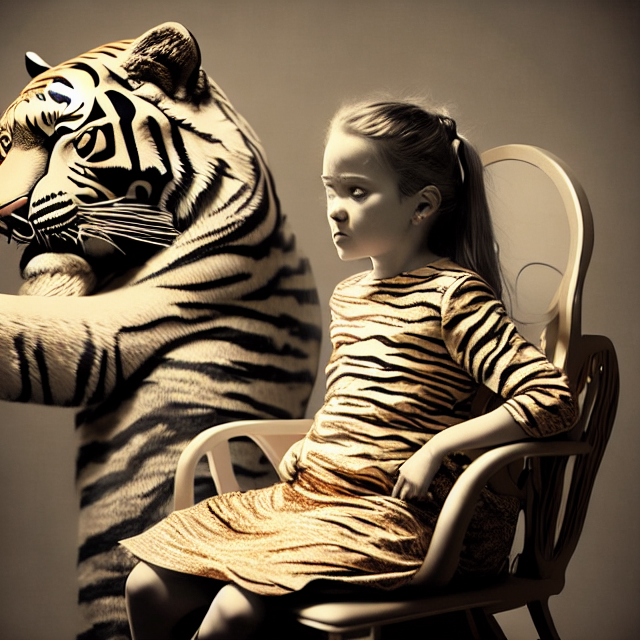

In [29]:
image

# Working with Stable Diffusion parameters
1.Negative prompting

2.num_inference_steps

3.height

4.weight

5.num_images_per_prompt

In [30]:

def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i]);
      ax[i].axis('off');

  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
  plt.tight_layout()

In [31]:
prompt = "dreamlike, beautiful girl playing the festival of colors, draped in traditional Indian attire, throwing colors"

params = {}

  0%|          | 0/50 [00:00<?, ?it/s]

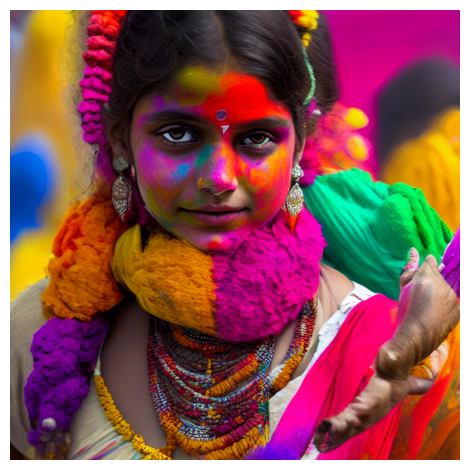

In [32]:
generate_image(pipe, prompt, params)

# num inference steps

  0%|          | 0/100 [00:00<?, ?it/s]

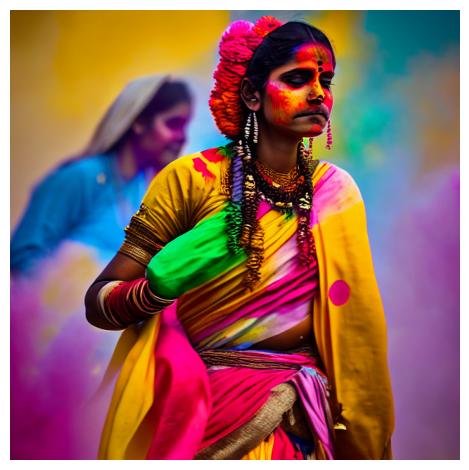

In [33]:
params = {'num_inference_steps': 100}
generate_image(pipe, prompt, params)

# height width

  0%|          | 0/100 [00:00<?, ?it/s]

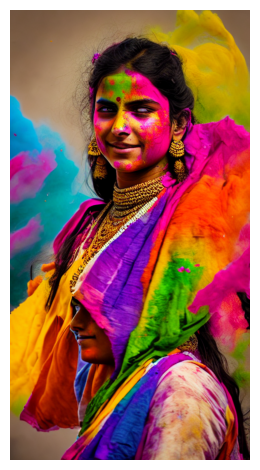

In [34]:

params = {'num_inference_steps': 100, 'width': 512, 'height': int(1.5*640)}

generate_image(pipe, prompt, params)


# num_images_per_prompt

  0%|          | 0/100 [00:00<?, ?it/s]

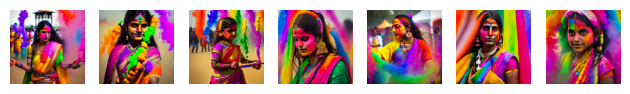

In [35]:

params = {'num_inference_steps': 100, 'num_images_per_prompt': 7}

generate_image(pipe, prompt, params)

# negative_prompt


  0%|          | 0/100 [00:00<?, ?it/s]

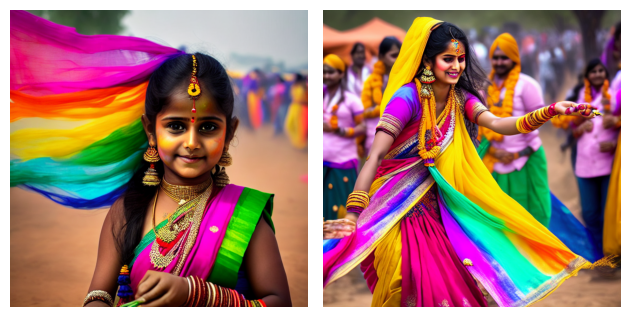

In [36]:
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2, 'negative_prompt': 'ugly, distorted, low quality'}

generate_image(pipe, prompt, params)